In [8]:
import hdf5plugin
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.dpi"] = 300

In [2]:
def plot_gene_expr(adata, gene_lst, rows, columns):
    
    fig, axs = plt.subplots(rows, columns, figsize=(7, 4))

    # Flatten the array of axes
    axs = axs.flatten()

    # Loop over your genes and create a UMAP plot for each
    for i, gene in enumerate(gene_lst):
        sc.pl.umap(adata, color=gene, add_outline=True, legend_loc='on data',
                   legend_fontsize=12, legend_fontoutline=2, frameon=True,
                   title=f'{gene}', palette='Set1', ax=axs[i], show=False)
    #     axs[i].set_rasterized(True)
    
    plt.savefig('./figures/umap_expression_plot.png', dpi=600, bbox_inches='tight')
    plt.tight_layout()
    plt.close()
    return fig

In [10]:
def plot_gene_expr(adata, gene_lst, rows, columns):
    fig, axs = plt.subplots(rows, columns, figsize=(7, 4))

    # Flatten the array of axes
    axs = axs.flatten()

    # Loop over your genes and create a UMAP plot for each
    for i, gene in enumerate(gene_lst):
        if i < len(axs):  # Check to avoid index errors if gene_lst is longer than axs
            sc.pl.umap(adata, color=gene, add_outline=True, legend_loc='on data',
                       legend_fontsize=12, legend_fontoutline=2, frameon=True,
                       title=f'{gene}', palette='Set1', ax=axs[i], show=False)
    
    # Adjust layout and save the figure
    plt.tight_layout()

    # Create directory if it doesn't exist
    output_dir = './figures'
    os.makedirs(output_dir, exist_ok=True)

    # Save the figure
    plt.savefig(os.path.join(output_dir, 'umap_expression_plot.png'), dpi=600, bbox_inches='tight')
    plt.close(fig)
    return fig

In [3]:
H5AD_PATH = "./data/7.H5AD_leiden&cell_annotation/scVI_integration_decoupleR_anno_v1.h5ad"

GENES = ['APOE', 'S100B', 'AQP4', 'SLC1A2', 'UNC5C', 'CST3']

In [4]:
adata = sc.read_h5ad(H5AD_PATH)
adata

AnnData object with n_obs × n_vars = 12626 × 19965
    obs: 'batch', 'condition', 'n_genes', 'prc_mt', 'prc_rb', 'n_counts', 'doublet', 'batch_num', '_scvi_batch', '_scvi_labels', 'leiden', 'cell_type'
    var: 'gene_ids'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_type_colors', 'condition_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap', 'ora_estimate', 'ora_pvals'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

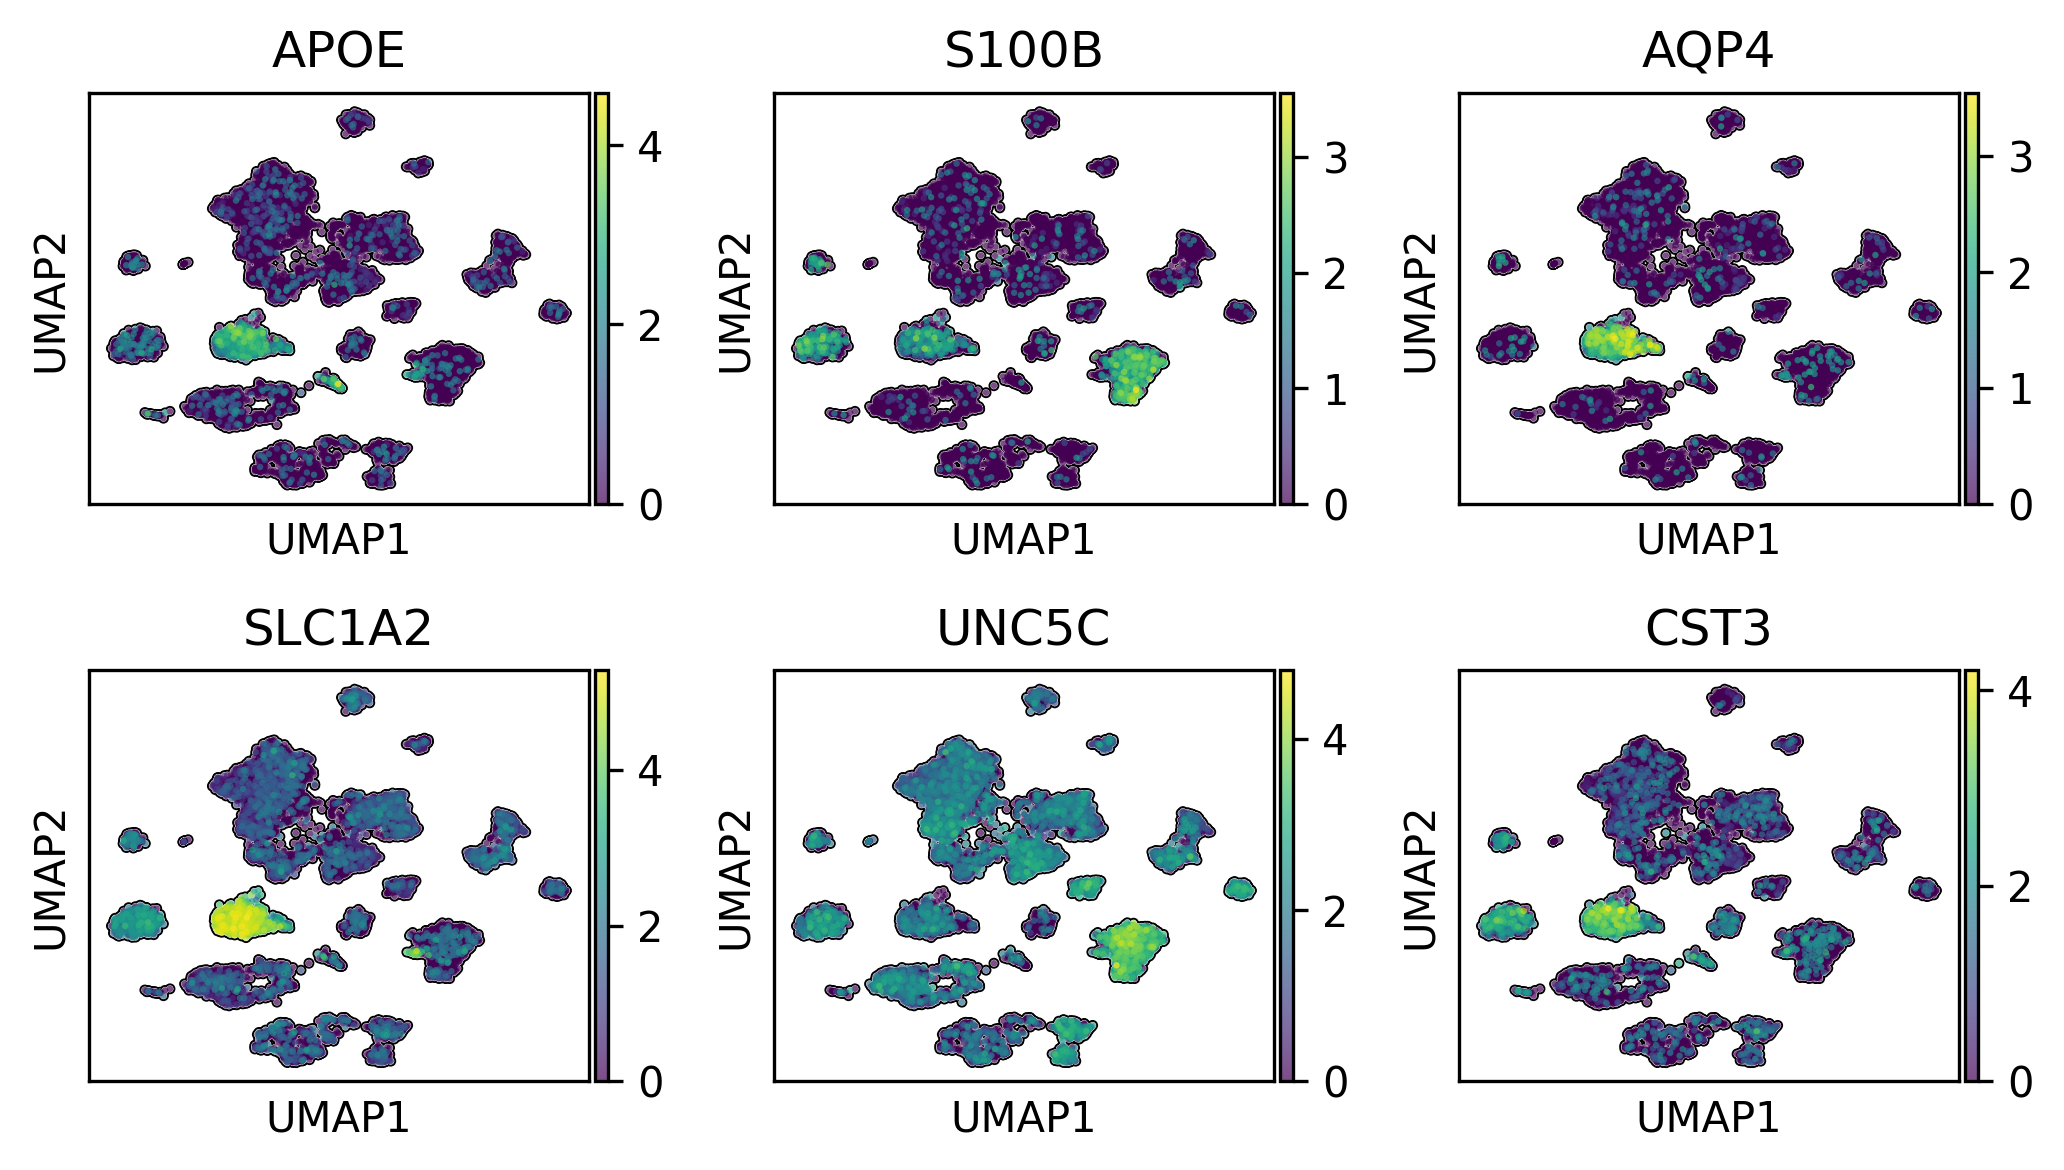

In [11]:
fig1 = plot_gene_expr(adata, GENES, 2, 3)
fig1